In [5]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder 

df_bike = pd.read_csv("Bike.csv")

df_bike.rename(columns={'cnt':'cnt_rental_bike'}, inplace=True)

In [10]:
print(df_bike.head())
print(df_bike.shape)
print(df_bike.dtypes)

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           1  0.24  0.2879  0.81        0.0       3          13   
1           1  0.22  0.2727  0.80        0.0       8          32   
2           1  0.22  0.2727  0.80        0.0       5          27   
3           1  0.24  0.2879  0.75        0.0       3          10   
4           1  0.24  0.2879  0.75        0.0       0           1   

   cnt_rental_bike  
0               16  
1               40  
2               32  
3               13  
4                

In [11]:
print(df_bike.isnull().sum())

instant            0
dteday             0
season             0
yr                 0
mnth               0
hr                 0
holiday            0
weekday            0
workingday         0
weathersit         0
temp               0
atemp              0
hum                0
windspeed          0
casual             0
registered         0
cnt_rental_bike    0
dtype: int64


In [12]:
print(df_bike.duplicated().sum())

0


In [13]:
df_bike['datetime'] = pd.to_datetime(df_bike['dteday']) + pd.to_timedelta(df_bike['hr'], unit='h')
print(df_bike[['dteday', 'hr','datetime']].head())
print(df_bike.dtypes['datetime'])

       dteday  hr            datetime
0  2011-01-01   0 2011-01-01 00:00:00
1  2011-01-01   1 2011-01-01 01:00:00
2  2011-01-01   2 2011-01-01 02:00:00
3  2011-01-01   3 2011-01-01 03:00:00
4  2011-01-01   4 2011-01-01 04:00:00
datetime64[ns]


In [14]:
print(df_bike.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
min        0.000000      0.000000      0.000000      1.000000      0.

In [17]:
print('total rentals:', df_bike['cnt_rental_bike'].sum())
print('avg rentals:', df_bike['cnt_rental_bike'].mean())
print('min rentals:', df_bike['cnt_rental_bike'].min())
print('max rentals:', df_bike['cnt_rental_bike'].max())

total rentals: 3292679
avg rentals: 189.46308763450142
min rentals: 1
max rentals: 977


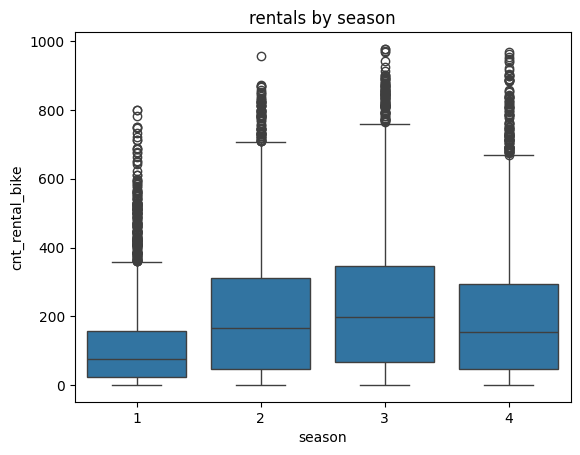

In [20]:
import seaborn as sns

sns.boxplot(x='season', y='cnt_rental_bike', data=df_bike)
plt.title('rentals by season')
plt.show()

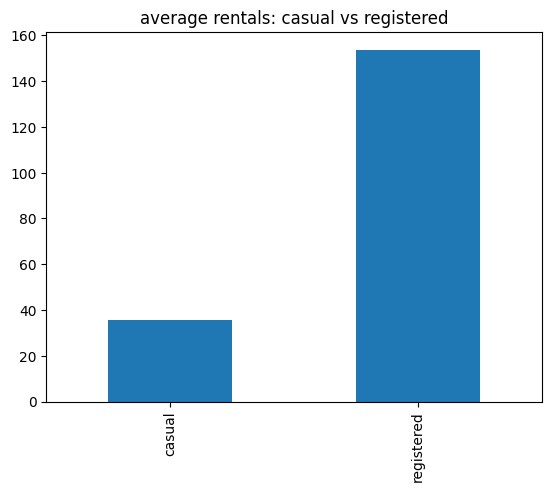

In [22]:
df_bike[['casual', 'registered']].mean().plot(kind='bar')
plt.title('average rentals: casual vs registered')
plt.show()

In [23]:
df_bike['weathersit'] = df_bike['weathersit'].map({
    1: 'clear',
    2: 'cloudy',
    3: 'light rain',
    4: 'heavy rain'
})

print(df_bike['weathersit'].unique())
print(df_bike['weathersit'].dtype)

['clear' 'cloudy' 'light rain' 'heavy rain']
object


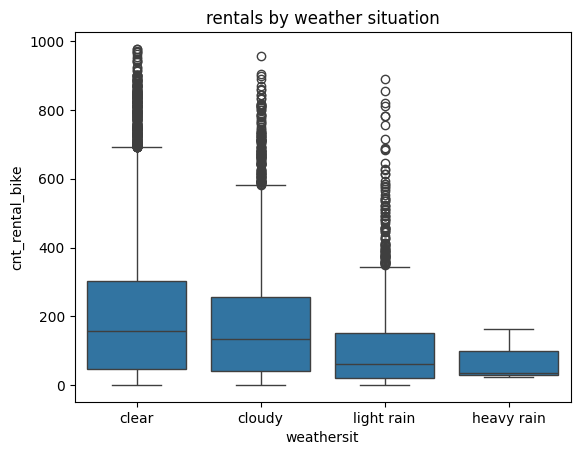

In [26]:
sns.boxplot(x='weathersit', y='cnt_rental_bike', data=df_bike)
plt.title('rentals by weather situation')
plt.show()

In [27]:
encoder = OneHotEncoder(drop='first')
encoded = encoder.fit_transform(df_bike[['weathersit']]).toarray()
print(encoded[:5])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)  
encoded = encoder.fit_transform(df_bike[['weathersit']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['weathersit']))
df_bike = pd.concat([df_bike.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print(df_bike.head())


   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

  weathersit  ...   atemp   hum  windspeed  casual  registered  \
0      clear  ...  0.2879  0.81        0.0       3          13   
1      clear  ...  0.2727  0.80        0.0       8          32   
2      clear  ...  0.2727  0.80        0.0       5          27   
3      clear  ...  0.2879  0.75        0.0       3          10   
4      clear  ...  0.2879  0.75        0.0       0           1   

   cnt_rental_bike            datetime weathersit_cloudy  \
0               16 2011-01-01 00:00:00               0.0   
1             

In [31]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()
df_bike['season_encoded'] = ordinal_encoder.fit_transform(df_bike[['season']])
print(df_bike[['season', 'season_encoded']].head())

   season  season_encoded
0       1             0.0
1       1             0.0
2       1             0.0
3       1             0.0
4       1             0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()

MinMaxScaler()


In [35]:
df_bike['temp_norm'] = scaler_minmax.fit_transform(df_bike[['temp']])
df_bike['temp_std'] = scaler_std.fit_transform(df_bike[['temp']])
print(df_bike[['temp', 'temp_norm', 'temp_std']].head())

   temp  temp_norm  temp_std
0  0.24   0.224490 -1.334648
1  0.22   0.204082 -1.438516
2  0.22   0.204082 -1.438516
3  0.24   0.224490 -1.334648
4  0.24   0.224490 -1.334648


1) (B) Nominal

2) nominal - categories withot order (colors for example)
ordinal - categories with natural order(education levek for example)

3) (A) True

4) The sum of the values ​​in these n columns = 1 for each row so the total sum is number of rows

5) To avoid multicollinearity
Statistical term is linear dependence of features

6) I think Ordinal Encoding cause these are ordered categories

7) For example if theres a 'country" feature with 200 categories so, you will get 200 new columns

8) (B) Standardization

9) (B) False

10) min=10, max=53, range=43
10 - (10-10)/43 = 0.00
22 - (22-10)/43 = 0.28
27 - (27-10)/43 = 0.40
53 - (53-10)/43 = 1.00

11) (75-50)/10 = 2.5

12) This is especially important for scale-sensitive models for example KNN, SVM, linear regression